## Model Discharge 

Text schreiben.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid', {'grid.linestyle': u'--'})
matplotlib.rc('pdf', fonttype=42)

NameError: name 'matplotlib' is not defined

In [2]:
# load daily data
WB_carlsfeld1D = pd.read_csv('WBcarlsfeld1D.csv', index_col=0)
WB_carlsfeld1D.index = pd.to_datetime(WB_carlsfeld1D.index)

In [3]:
import spotpy
import pyGR4J as pG

In [25]:
params = [86.,0.73,9.,1.3,0.9]

#set weights of lag function
w1 = pG.tWeightsL1(params[3])
w2 = pG.tWeightsL2(params[3])

Qsim = pG.pyGR4J(WB_carlsfeld1D[['Prec','ETo','BachOst']].values,params,w1,w2)
Qsim = pd.Series(Qsim,index=WB_carlsfeld1D.index)
Qsim.name = 'Simulation'

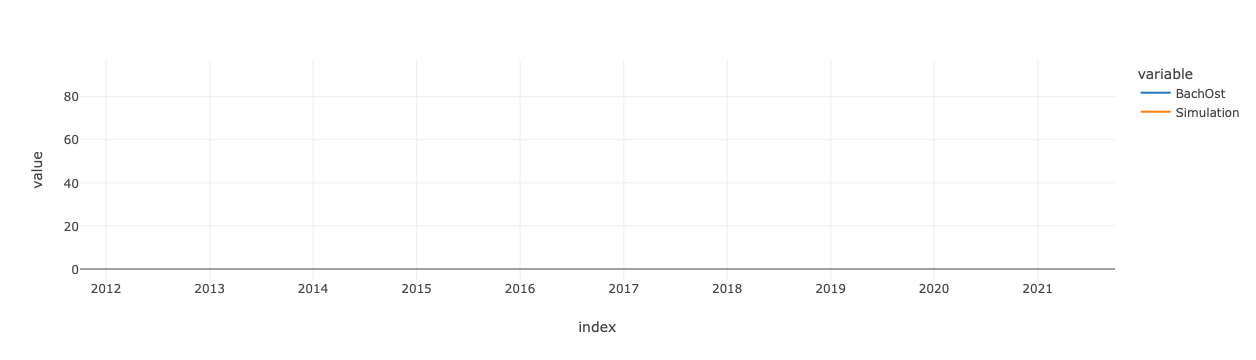

In [27]:
px.line(pd.concat([WB_carlsfeld1D.BachOst,Qsim],axis=1), template='none')

In [8]:
class spotpy_setup(object):
    def __init__(self):
        self.params = [spotpy.parameter.Uniform('SMA',low=1.0 , high=500.,  optguess=86.),   #Capacity of the production soil (SMA) store (mm)
                       spotpy.parameter.Uniform('Wex',low=-2. , high=3.,  optguess=0.73),#Water exchange coefficient (mm)
                       spotpy.parameter.Uniform('CapR',low=1.0 , high=300., optguess=9.), #Capacity of the routing store (mm)
                       spotpy.parameter.Uniform('Ti',low=0. , high=7.5, optguess=1.3), #Time parameter (days) for unit hydrographs
                       spotpy.parameter.Uniform('Spl',low=0.2 , high=0.99, optguess=0.9)
                       ]
        self.evals = WB_carlsfeld1D.BachOst.values
        
    def parameters(self):
        return spotpy.parameter.generate(self.params)
    
    def simulation(self,x):
        #set weights of lag function
        w1 = pG.tWeightsL1(x[3])
        w2 = pG.tWeightsL2(x[3])

        qsim = pG.pyGR4J(WB_carlsfeld1D[['Prec','ETo','Wilzsch']].values,x,w1,w2)
        return qsim
    
    def evaluation(self):
        return self.evals
    
    def objectivefunction(self,simulation,evaluation, params=None):
        #try:
        #    like = spotpy.objectivefunctions.kge_non_parametric(evaluation,simulation) 
        #except:
        import hydroeval as he
        like = he.kge(simulation[40:],evaluation[40:])[0][0] #allow for 40 days spin-up
        return like

spot_setup=spotpy_setup()

In [9]:
#test
x = spot_setup.parameters()['random']
simulation = spot_setup.simulation(x)
spot_setup.objectivefunction(simulation,spot_setup.evaluation())

-0.15907646596568736

In [10]:
dbname = 'pyGR4J_Wilzsch1'
rep = 5000
dream_sampler = spotpy.algorithms.dream(spot_setup, dbname='DREAM_'+dbname, dbformat='csv')
dream_sampler.sample(rep, nChains=8, convergence_limit=0.05, runs_after_convergence=200)


Initializing the  DiffeRential Evolution Adaptive Metropolis (DREAM) algorithm  with  5000  repetitions
The objective function will be maximized
Starting the DREAM algotrithm with 5000 repetitions...
Initialize  8  chain(s)...
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
* Database file 'DREAM_pyGR4J_Wilzsch1.csv' created.
6 of 5000, maximal objective function=0.0338212, time remaining: 00:24:23
Beginn of Random Walk


//Users/cojack/anaconda3/lib/python3.9/site-packages/hydroeval/objective_functions.py:80: RuntimeWarning:

invalid value encountered in double_scalars



13 of 5000, maximal objective function=0.0348113, time remaining: 00:24:56
20 of 5000, maximal objective function=0.0578091, time remaining: 00:24:57
Acceptance rates [%] =100. 100. 100.  50. 100. 100. 100. 100.
Convergence rates =3.6151 2.2478 2.0206 1.921  1.7355
26 of 5000, maximal objective function=0.0578091, time remaining: 00:26:09
32 of 5000, maximal objective function=0.0578091, time remaining: 00:26:52
Acceptance rates [%] =100.   100.   100.    66.67 100.   100.   100.   100.  
Convergence rates =2.7319 1.3382 1.5644 1.6137 2.651 
39 of 5000, maximal objective function=0.0578091, time remaining: 00:27:04
Acceptance rates [%] =100. 100. 100.  75. 100. 100. 100. 100.
Convergence rates =1.9821 1.4906 1.6245 1.4566 3.0225
45 of 5000, maximal objective function=0.0578091, time remaining: 00:27:36
Acceptance rates [%] =100. 100. 100.  80. 100. 100. 100. 100.
Convergence rates =1.7464 1.6968 1.9624 1.6052 2.1935
50 of 5000, maximal objective function=0.0578091, time remaining: 00:2

//Users/cojack/anaconda3/lib/python3.9/site-packages/spotpy/algorithms/dream.py:111: RuntimeWarning:

divide by zero encountered in double_scalars



85 of 5000, maximal objective function=0.0578091, time remaining: 00:29:34
Acceptance rates [%] =100. 100. 100.  90.  90. 100. 100.  90.
Convergence rates =1.3918 1.5509 1.6097 1.3367 1.3263
91 of 5000, maximal objective function=0.0578091, time remaining: 00:29:34
Acceptance rates [%] =100.   100.   100.    90.91  90.91 100.   100.    90.91
Convergence rates =1.2645 1.3876 1.581  1.4413 1.3449
97 of 5000, maximal objective function=0.0578091, time remaining: 00:29:27
103 of 5000, maximal objective function=0.0578091, time remaining: 00:29:18
Acceptance rates [%] =100.   100.   100.    91.67  91.67 100.    91.67  91.67
Convergence rates =1.1904 1.283  1.4743 1.5049 1.282 
110 of 5000, maximal objective function=0.0578091, time remaining: 00:28:56
Acceptance rates [%] = 92.31 100.    92.31  84.62  84.62 100.    92.31  92.31
Convergence rates =1.2505 1.2956 1.509  1.7443 1.2928
117 of 5000, maximal objective function=0.0578091, time remaining: 00:28:38
Acceptance rates [%] = 92.86  92.86

[array([3.28950025, 2.5919954 , 2.3600623 , 3.24772661, 2.58332562]),
 array([3.61506302, 2.24781183, 2.02055575, 1.92095844, 1.73548415]),
 array([2.73191996, 1.33818175, 1.56435279, 1.61372448, 2.65102361]),
 array([1.98205405, 1.4905691 , 1.62452627, 1.45658235, 3.0225399 ]),
 array([1.74636393, 1.69678791, 1.96235849, 1.60516211, 2.1934925 ]),
 array([1.55084847, 1.8742905 , 1.71769107, 1.69172078, 1.70259695]),
 array([1.57229637, 1.9792901 , 1.6704627 , 1.58153495, 1.92828056]),
 array([1.47941299, 2.03737856, 1.54786506, 1.42518826, 1.65503679]),
 array([1.33697395, 1.91576579, 1.56833798, 1.3772928 , 1.48173656]),
 array([1.39177271, 1.55087667, 1.60973274, 1.33672529, 1.32632693]),
 array([1.26445336, 1.38760733, 1.581022  , 1.4413303 , 1.3448563 ]),
 array([1.19039865, 1.28295222, 1.47431757, 1.50493371, 1.2820326 ]),
 array([1.25046476, 1.29560009, 1.5090496 , 1.74430218, 1.29281067]),
 array([1.18613744, 1.28408073, 1.45647249, 1.57088532, 1.29838248]),
 array([1.13348229, 

In [11]:
import hydroeval as he
from scipy.stats import spearmanr
from scipy.stats import linregress
#dbname = 'pyGR4J_Wilzsch'

evalx = WB_carlsfeld1D.Wilzsch
results = spotpy.analyser.load_csv_results('DREAM_'+dbname)
# Get fields with simulation data
fields = [word for word in results.dtype.names if word.startswith('sim')]
resDF = pd.DataFrame(results)
def eval2(x, y):
    return pd.Series(np.concatenate((linregress(x, y)[:], spearmanr(x, y)[:])),
                     index=['slope', 'intercept', 'rvalue', 'pvalue', 'stderr', 'spearman_corr', 'spearman_p'])
cidx = np.where(resDF.columns.str.contains("simulat"))[0]
resDF['KGE'] = np.nan
resDF['spearman_corr'] = np.nan
resDF['R2'] = np.nan

for i in resDF.index:
    resDF.loc[i, 'spearman_corr'] = eval2(evalx.values, resDF.iloc[i, cidx].values)[-2]
    resDF.loc[i, 'R2'] = eval2(evalx.values, resDF.iloc[i, cidx].values)[-3] ** 2
    resDF.loc[i, 'KGE'] = he.kge(resDF.iloc[i, cidx].values, evalx.values)[0][0]

TypeError: __init__() got an unexpected keyword argument 'ncl'

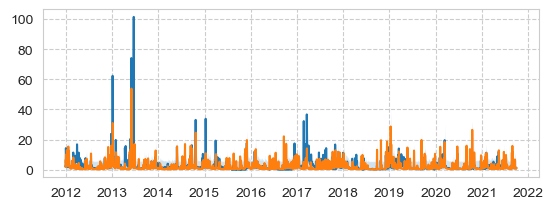

In [28]:
plt.subplot(211)
plt.fill_between(evalx.index[90:], (resDF.iloc[:, cidx].min()[90:]), (resDF.iloc[:, cidx].max()[90:]), alpha=0.2,label='parameter space')

plt.plot(evalx.index[90:], (evalx.values[90:]), label='Observation')
#plot(eval.index[90:], (resDF.iloc[resDF['like1'].idxmax(), cidx].values[90:]), label='max like')
plt.plot(evalx.index[90:], (resDF.iloc[resDF['KGE'].idxmax(), cidx].values[90:]), label='max KGE')

plt.legend(ncl=3)
ylim(0,11)
ylabel('Q (mm/day)')
tick_params(labelbottom=False)

plt.subplot(212)
plt.fill_between(evalx.index[90:], np.cumsum(resDF.iloc[:, cidx].min()[90:]), np.cumsum(resDF.iloc[:, cidx].max()[90:]), alpha=0.2,label='parameter space')

plt.plot(evalx.index[90:], np.cumsum(evalx.values[90:]), label='Observation')
#plot(eval.index[90:], np.cumsum(resDF.iloc[resDF['like1'].idxmax(), cidx].values[90:]), label='max like')
plt.plot(evalx.index[90:], np.cumsum(resDF.iloc[resDF['KGE'].idxmax(), cidx].values[90:]), label='max KGE')

ylim(0,1000)
ylabel('$\sum$Q (mm/day)')